In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data = pd.read_csv('gld_price_data.csv')

In [3]:
gold_data.shape

(2290, 6)

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
gold_data = gold_data.drop(columns=['Date'])

print(gold_data)

              SPX         GLD        USO      SLV   EUR/USD
0     1447.160034   84.860001  78.470001  15.1800  1.471692
1     1447.160034   85.570000  78.370003  15.2850  1.474491
2     1411.630005   85.129997  77.309998  15.1670  1.475492
3     1416.180054   84.769997  75.500000  15.0530  1.468299
4     1390.189941   86.779999  76.059998  15.5900  1.557099
...           ...         ...        ...      ...       ...
2285  2671.919922  124.589996  14.060000  15.5100  1.186789
2286  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 5 columns]


In [12]:
#Correlation

correlation = gold_data.corr()

<Axes: >

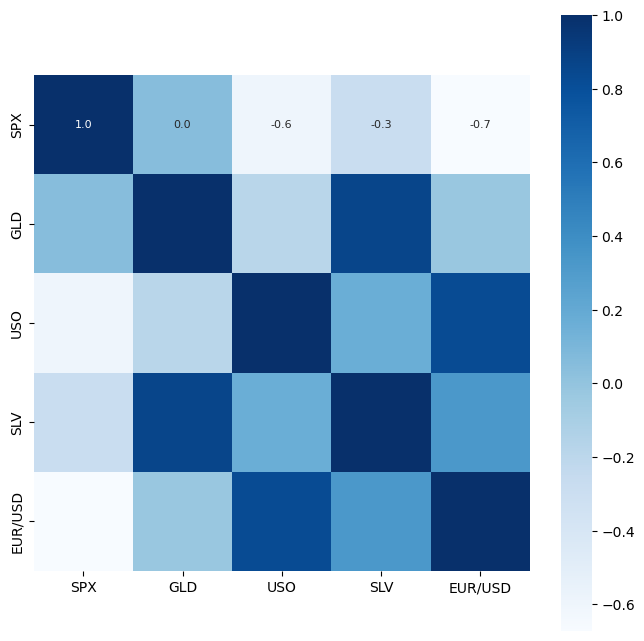

In [13]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Blues')

In [14]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\musta\AppData\Local\Temp\ipykernel_7488\1356789424.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color = 'green')
C:\Users\musta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GLD', ylabel='Density'>

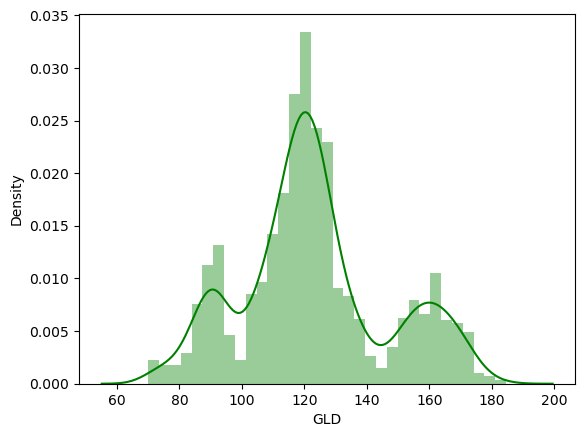

In [15]:
sns.distplot(gold_data['GLD'], color = 'green')

In [17]:
# Splitting the Features and Target

X = gold_data.drop(['GLD'], axis = 1)
Y = gold_data['GLD']

In [18]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [19]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [21]:
#Splitting ,nto Training data and Test data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [22]:
#Model Training
regressor = RandomForestRegressor(n_estimators = 100)

In [23]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [24]:
#Prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [25]:
print(test_data_prediction)

[168.6447995   81.86110006 116.08020038 127.44900055 120.84260144
 154.66119797 150.37069786 126.10879988 117.38119873 126.00850079
 116.66190085 171.37220063 141.52319845 167.92999872 115.09790005
 117.49000032 140.41680345 170.58340196 158.88300256 160.31359888
 155.09440026 125.2339     175.8107     158.21840348 125.17960036
  93.8737996   78.18909987 120.47909978 119.19649967 167.38219999
  88.0649003  125.2102001   91.2272008  117.69540007 121.1765991
 136.69140084 115.41670166 115.20490057 147.87419929 107.09450091
 104.34030244  87.16959801 126.56830047 118.11529993 153.7205988
 119.6399999  108.34839978 107.99739823  93.12710032 127.15189741
  74.86410035 113.62019875 121.37210012 111.30719916 118.95399891
 120.19029983 159.3210998  168.49360122 147.08879683  85.84739856
  94.4318003   86.88279892  90.63429992 119.05220054 126.48400045
 127.67500046 170.73560016 122.35789909 117.42469913  98.80850046
 168.43480164 143.20729846 132.23160234 120.99820196 121.08339959
 119.5389008

In [26]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9892714611947274


In [27]:
#Compare the Actual Values and Predicted Values in a PLot

Y_test = list(Y_test)

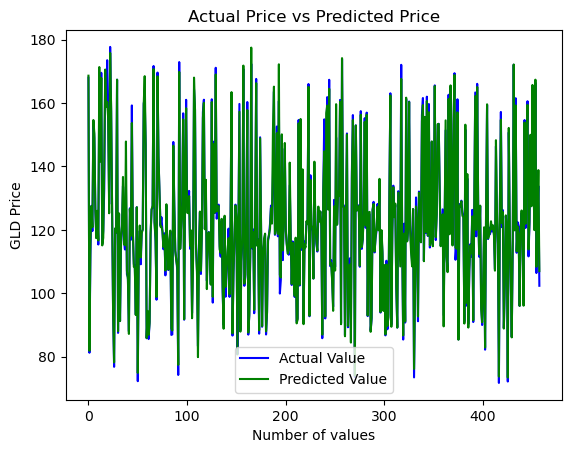

In [30]:
plt.plot(Y_test, color = 'blue', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()